<a href="https://colab.research.google.com/github/mithinKumar/Machine-Learning-Learners-Space/blob/main/Copy_of_assignment_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data
from google.colab import files
uploaded = files.upload()

data=np.loadtxt("data.txt", delimiter=',')
X=data[:,:2]
y=data[:,2]
X_train=X
y_train=y

Saving data.txt to data.txt


In [3]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for

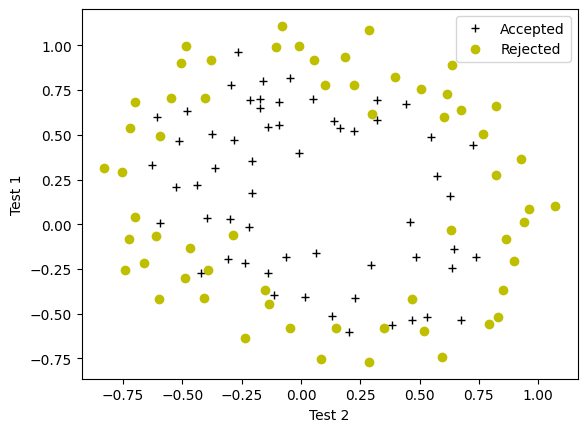

In [4]:
#test
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()

In [5]:
#feature mapping
def map_feature(X1,X2):
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=6
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)

In [6]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [7]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [8]:
def sigmoid(z):

    s = 1 / (1 + np.exp(-z))
    return s
def sigmoid_test(sigmoid_func):
    # Test on scalar values
    z_scalar = 0
    print(f"Sigmoid of {z_scalar}: {sigmoid_func(z_scalar)}")

    # Test on numpy arrays
    z_array = np.array([-2, -1, 0, 1, 2])
    print(f"Sigmoid of {z_array}: {sigmoid_func(z_array)}")

In [9]:
sigmoid_test(sigmoid)


Sigmoid of 0: 0.5
Sigmoid of [-2 -1  0  1  2]: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


In [10]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [11]:
def compute_cost(X, y, w, b, lambda_=1):

    m = X.shape[0]  # Number of training examples
    z = np.dot(X, w) + b  # Linear combination of weights and input

    # Compute sigmoid of z
    y_pred = sigmoid(z)

    # Compute cost function (binary cross-entropy)
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    # Add regularization term to the cost
    regularization_term = (lambda_ / (2 * m)) * np.sum(w**2)
    total_cost = cost + regularization_term

    return total_cost

def compute_cost_test(cost_func):
    # Example data
    X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    y = np.array([1, 0, 1])
    w = np.array([0.1, 0.2, 0.3])
    b = 0.5

    # Compute cost using the provided cost function
    cost = cost_func(X, y, w, b)
    print(f"Cost computed: {cost}")

In [12]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Cost computed: 1.3126293491624368


In [13]:
def compute_cost_reg(X, y, w, b, lambda_=1):

    m = X.shape[0]  # Number of training examples
    z = np.dot(X, w) + b  # Linear combination of weights and input

    # Compute sigmoid of z
    y_pred = sigmoid(z)

    # Compute cost function (binary cross-entropy)
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    # Regularization term
    regularization_term = (lambda_ / (2 * m)) * np.sum(w**2)

    # Total regularized cost
    total_cost = cost + regularization_term

    return total_cost

def compute_cost_reg_test(cost_func):
    # Example data
    X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    y = np.array([1, 0, 1])
    w = np.array([0.1, 0.2, 0.3])
    b = 0.5

    # Compute regularized cost using the provided cost function
    cost = cost_func(X, y, w, b)
    print(f"Regularized Cost computed: {cost}")

In [14]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [15]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6618252552483951
All tests passed!


In [16]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [17]:
def compute_gradient(X, y, w, b, lambda_=None):


    m = X.shape[0]  # Number of training examples

    # Compute predicted labels
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Compute gradients
    dj_dz = y_pred - y
    dj_db = (1 / m) * np.sum(dj_dz)
    dj_dw = (1 / m) * np.dot(X.T, dj_dz)

    # Add regularization terms if lambda_ is specified
    if lambda_ is not None:
        dj_dw += (lambda_ / m) * w

    return dj_db, dj_dw
def compute_gradient_test(grad_func):
    # Example data
    X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    y = np.array([1, 0, 1])
    w = np.array([0.1, 0.2, 0.3])
    b = 0.5

    # Compute gradients using the provided gradient function
    dj_db, dj_dw = grad_func(X, y, w, b)
    print(f"Gradient of b computed: {dj_db}")
    print(f"Gradient of w computed: {dj_dw}")

In [18]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465381, -0.09147300847306207]
Gradient of b computed: 0.28056478883447894
Gradient of w computed: [1.24829749 1.52886228 1.80942707]


In [19]:
def compute_gradient_reg(X, y, w, b, lambda_=1):

    m = X.shape[0]  # Number of training examples

    # Compute predicted labels
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)

    # Compute gradients
    dj_dz = y_pred - y
    dj_db = (1 / m) * np.sum(dj_dz)
    dj_dw = (1 / m) * np.dot(X.T, dj_dz)

    # Add regularization terms
    dj_dw += (lambda_ / m) * w

    return dj_db, dj_dw
def compute_gradient_reg_test(grad_func):
    # Example data
    X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    y = np.array([1, 0, 1])
    w = np.array([0.1, 0.2, 0.3])
    b = 0.5

    # Compute regularized gradients using the provided gradient function
    dj_db, dj_dw = grad_func(X, y, w, b)
    print(f"Regularized Gradient of b computed: {dj_db}")
    print(f"Regularized Gradient of w computed: {dj_dw}")

In [20]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [21]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343654
Tests passed!


In [22]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.0001
iterations = 10000
alpha = 0.1
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                     compute_cost_reg, compute_gradient_reg,
                     alpha, iterations, lambda_):

    w = initial_w
    b = initial_b
    J_history = []  # To store the cost at each iteration

    for i in range(iterations):
        # Compute cost and gradient with regularization
        cost = compute_cost_reg(X_mapped, y_train, w, b, lambda_)
        dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Append current cost to history
        J_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, J_history,_



w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration 0: Cost = 0.7215803069185565
Iteration 100: Cost = 0.5872608259692129
Iteration 200: Cost = 0.5568327454536812
Iteration 300: Cost = 0.5327319294068457
Iteration 400: Cost = 0.5130740701425207
Iteration 500: Cost = 0.4967218855302554
Iteration 600: Cost = 0.4828979409992906
Iteration 700: Cost = 0.47105262210947246
Iteration 800: Cost = 0.460786365004741
Iteration 900: Cost = 0.45180161386936857
Iteration 1000: Cost = 0.4438720869063885
Iteration 1100: Cost = 0.43682251177602816
Iteration 1200: Cost = 0.4305149043888356
Iteration 1300: Cost = 0.42483905759564067
Iteration 1400: Cost = 0.4197058089181752
Iteration 1500: Cost = 0.4150421850858438
Iteration 1600: Cost = 0.41078784017243775
Iteration 1700: Cost = 0.4068924019205789
Iteration 1800: Cost = 0.4033134664512011
Iteration 1900: Cost = 0.40001506305248835
Iteration 2000: Cost = 0.3969664646486676
Iteration 2100: Cost = 0.3941412558347837
Iteration 2200: Cost = 0.3915165951835855
Iteration 2300: Cost = 0.3890726257613734

In [23]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))


        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


        z = z.T


        plt.contour(u,v,z, levels = [0.5], colors="g")

<ipython-input-23-1a0f4325d43d>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


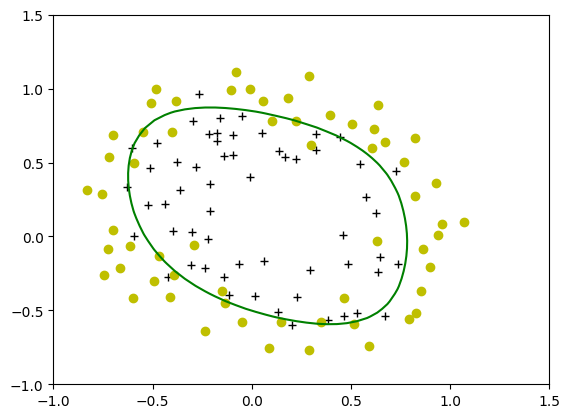

In [24]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [25]:
import numpy as np

def predict(X, w, b):

    m, n = X.shape
    p = np.zeros(m)

    # Compute predicted probabilities
    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))

    # Convert probabilities to binary predictions (0 or 1)
    p[y_pred >= 0.5] = 1

    return p.astype(int)



In [26]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 83.898305
